## Predicting-Customer-Churn-in-Banking-using-Transactional-Data

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Display plots within the notebook
%matplotlib inline

In [2]:
## Importing necessary modules for data preprocessing and model building

from sklearn.impute import SimpleImputer # To impute missing values in data
from sklearn.preprocessing import LabelEncoder # To encode categorical variables
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.svm import SVC # To implement Support Vector Machine (SVM) algorithm
from sklearn.linear_model import LogisticRegression # To implement Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier # To implement Decision Tree algorithm
from sklearn.ensemble import RandomForestClassifier # To implement Random Forest algorithm
from sklearn.model_selection import GridSearchCV # To perform grid search for hyperparameter tuning

## Importing necessary modules for model evaluation and improvement

from sklearn.metrics import confusion_matrix, accuracy_score # To compute the confusion matrix and accuracy score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score # To compute additional evaluation metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor # To check for multicollinearity in data
from sklearn.model_selection import cross_val_score # To perform cross validation
from sklearn.model_selection import ShuffleSplit, KFold # To split data into train-test splits for cross validation
from sklearn import feature_selection # To perform feature selection
from sklearn import model_selection # To perform model selection
from sklearn import metrics # To compute additional evaluation metrics
from sklearn.metrics import classification_report, precision_recall_curve # To compute classification report and precision-recall curve
from sklearn.metrics import auc, roc_auc_score, roc_curve # To compute Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import make_scorer, recall_score, log_loss, average_precision_score # To compute additional evaluation metrics
from pandas.plotting import scatter_matrix # To create scatter matrix for data visualization
from sklearn.metrics import roc_curve # To compute ROC curve for model evaluation

In [3]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from the drive
dataset = pd.read_excel('/content/drive/MyDrive/Data Folder/CHURNDATA.xlsx')

# Print the first few rows of the DataFrame
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
#dataset = pd.read_excel("CHURNDATA.xlsx")

In [5]:
dataset.shape

(1249, 28)

In [6]:
dataset.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [7]:
dataset.nunique()

CIF                                      1
CUS_DOB                               1161
AGE                                     72
CUS_Month_Income                       278
CUS_Gender                               2
CUS_Marital_Status                       6
CUS_Customer_Since                     213
YEARS_WITH_US                           23
# total debit transactions for S1      231
# total debit transactions for S2      240
# total debit transactions for S3      244
total debit amount for S1             1098
total debit amount for S2             1054
total debit amount for S3             1031
# total credit transactions for S1      62
# total credit transactions for S2      68
# total credit transactions for S3      69
total credit amount for S1             834
total credit amount for S2             843
total credit amount for S3             834
total debit amount                    1219
total debit transactions               434
total credit amount                   1001
total credi

In [8]:
dataset.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

In [9]:
dataset.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.406761e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


### Observations:
- Our customers have an average tenure of 14 years and the maximum tenure is 28 years.
- The average age of our customers is 46 years and the oldest customer we have is 119 years old.
- More than half of our customers are above the age of 46.
- Only 25% of our customers are below the age of 39.
- On average, there are 192 total transactions that occur over 3 seasons.
- The maximum total transactions recorded over 3 seasons is 2174.

In [10]:
dataset.dtypes

CIF                                           object
CUS_DOB                                       object
AGE                                            int64
CUS_Month_Income                             float64
CUS_Gender                                    object
CUS_Marital_Status                            object
CUS_Customer_Since                    datetime64[ns]
YEARS_WITH_US                                  int64
# total debit transactions for S1              int64
# total debit transactions for S2              int64
# total debit transactions for S3              int64
total debit amount for S1                    float64
total debit amount for S2                    float64
total debit amount for S3                    float64
# total credit transactions for S1             int64
# total credit transactions for S2             int64
# total credit transactions for S3             int64
total credit amount for S1                   float64
total credit amount for S2                   f

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [12]:
## Converting into datetime datatype
dataset['CUS_DOB'] = pd.to_datetime(dataset['CUS_DOB'])

In [13]:
## Extracting Year from Customer DoB as a feature
dataset['CUS_DOB_YEAR'] = dataset['CUS_DOB'].dt.year

In [14]:
dataset.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [15]:
dataset[dataset.isna().any(axis=1)]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,CUS_DOB_YEAR
85,XXXXXX,1957-04-03,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,...,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE,1957
99,XXXXXX,1953-12-31,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,...,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE,1953
184,XXXXXX,1900-01-01,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,...,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN,1900
316,XXXXXX,1975-01-02,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,...,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN,1975
368,XXXXXX,1976-05-07,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,...,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE,1976
400,XXXXXX,1963-07-15,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,...,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN,1963
427,XXXXXX,1963-12-07,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,...,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE,1963
857,XXXXXX,1961-02-02,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,...,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE,1961
938,XXXXXX,1976-03-13,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,...,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE,1976
996,XXXXXX,1900-01-01,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,...,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN,1900


- Since the "CUS_Month_Income" column contains continuous numerical data, we can fill in any missing values with the mean monthly income.
- There are only two missing values in the "CUS_Gender" column, which is a categorical variable. We can fill these missing values with the mode (i.e., most frequently occurring value) of the column.

## Handling Missing values using SK-Learn Imputer

In [16]:
## Reason for choosing SK LEARN imputer is that we can do imputation all at once. 
##Instead of seperately calculating mean or frequency occured each time. 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['CUS_Month_Income']])
dataset[['CUS_Month_Income']] = imputer.transform(dataset[['CUS_Month_Income']])

In [17]:
## To check the most occuring data point so that we can replace the nan value with this.
dataset['CUS_Gender'].value_counts().idxmax()

'MALE'

In [18]:
dataset['CUS_Gender'].replace(np.nan, 'MALE', inplace=True)

In [19]:
## I choose to impute the missing values as this is already smaller dataset and also 
dataset.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [20]:
## All categorical columns
print(dataset["CUS_Marital_Status"].unique())
print(dataset['TAR_Desc'].unique())
print(dataset["CUS_Gender"].unique())
print(dataset["Status"].unique())

['MARRIED' 'SINGLE' 'WIDOWED' 'DIVORCE' 'OTHER' 'PARTNER']
['EXECUTIVE' 'LOW' 'MIDLE' 'PLATINUM']
['MALE' 'FEMALE']
['ACTIVE' 'CHURN']


In [21]:
## Correcting spelling
dataset['TAR_Desc']=dataset['TAR_Desc'].replace('MIDLE','MIDDLE')

In [22]:
print(dataset['TAR_Desc'].unique())

['EXECUTIVE' 'LOW' 'MIDDLE' 'PLATINUM']


In [23]:
dataset["Status"].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

In [24]:
## Active=0, CHURN=1
dataset['Status'] = dataset['Status'].replace(['ACTIVE','CHURN'],[0,1])

## Male=0, Female=1
dataset['CUS_Gender'] = dataset['CUS_Gender'].replace(['MALE','FEMALE'],[0,1])

<ipython-input-25-3eb09005c87c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cmap='RdBu')


<Axes: >

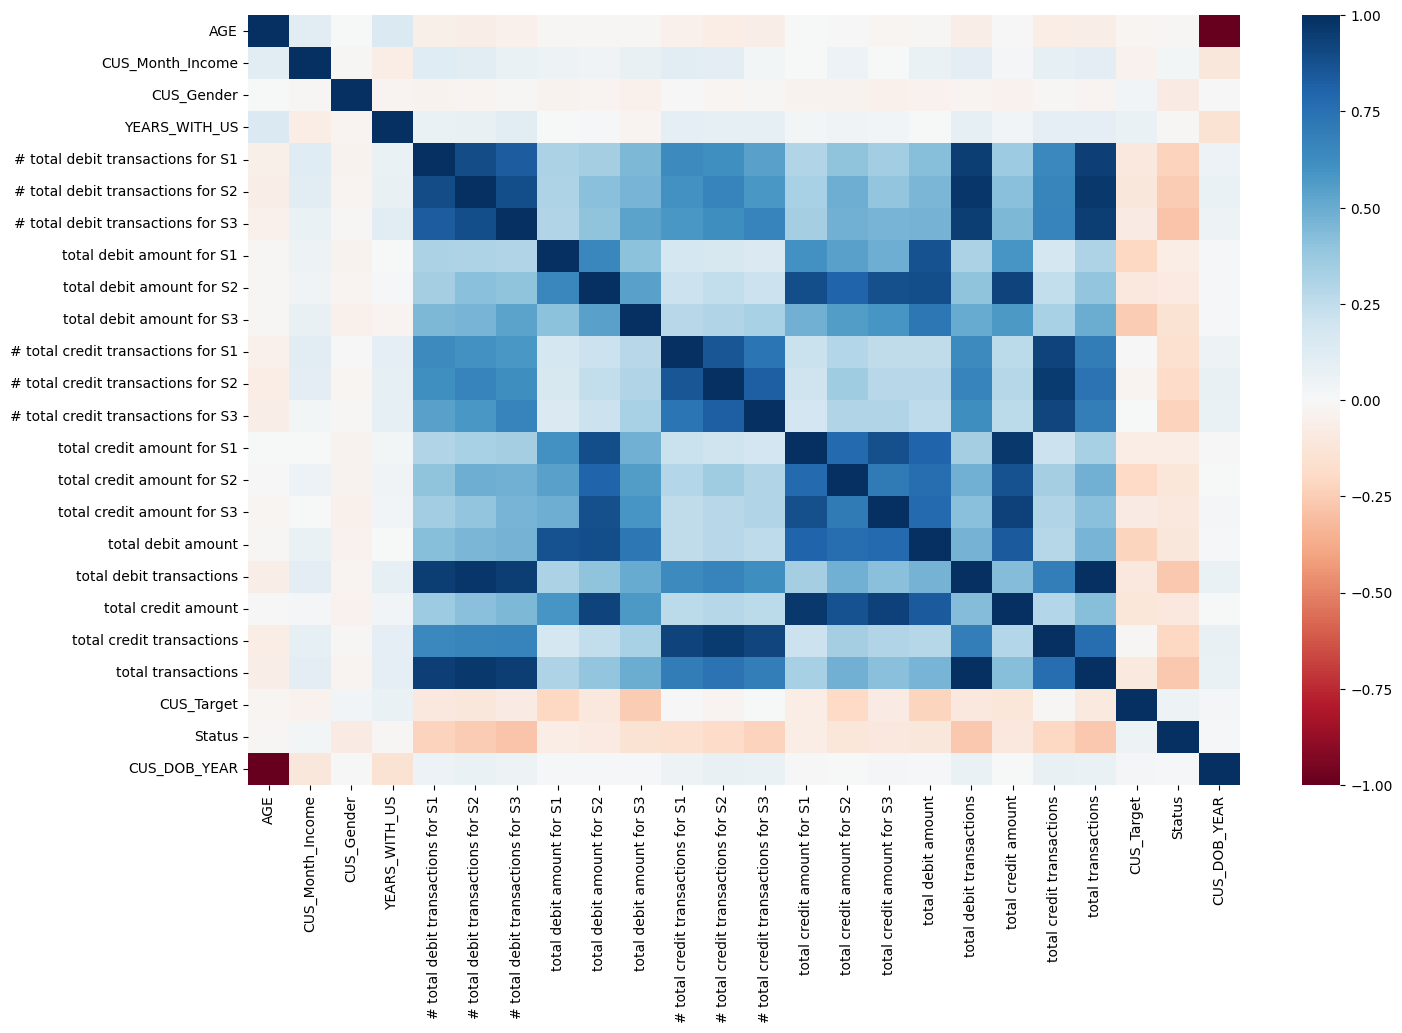

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),cmap='RdBu')

In [26]:
dataset.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CUS_DOB_YEAR'],
      dtype='object')

In [27]:
dataset["Status"].value_counts()

0    1022
1     227
Name: Status, dtype: int64

## Handling Imbalanced Data using SK-Lean resample

In [28]:
from sklearn.utils import resample
## Oversampling using SK-LEARN Resample

dataset_major = dataset[dataset['Status'] == 0]
dataset_minor = dataset[dataset['Status'] == 1] 

## Over/Up-Sampling Minority class using sklearn resample

dataset_min_sample = resample(dataset_minor, 
                              replace=True, 
                              n_samples=1022, 
                              random_state=20)

## Combining major and over sample class
data_Osamp = pd.concat([dataset_major, dataset_min_sample])

data_Osamp.Status.value_counts()

0    1022
1    1022
Name: Status, dtype: int64

In [29]:
df = data_Osamp[['CUS_DOB_YEAR','AGE','CUS_Month_Income','CUS_Gender','CUS_Marital_Status',
                      'YEARS_WITH_US','total debit amount','total credit amount','total debit transactions',
                      'total credit transactions','total transactions','TAR_Desc','Status']]

In [30]:
df

,CUS_DOB_YEAR,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total debit transactions,total credit transactions,total transactions,TAR_Desc,Status
0,1970,49,7116.64,0,MARRIED,25,4758311.63,5659653.33,887,65,952,EXECUTIVE,0
1,1973,46,1500000.00,1,SINGLE,14,139363.22,87000.00,97,10,107,LOW,0
2,1966,53,5000000.00,1,SINGLE,14,37375.46,1020883.70,53,27,80,MIDDLE,0
3,2004,15,500.00,1,SINGLE,14,4000.00,76946.96,1,12,13,LOW,0
4,1971,48,9000000.00,1,SINGLE,5,338470.29,442100.00,60,21,81,LOW,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1978,41,1600.00,1,MARRIED,14,758456.39,402000.00,141,2,143,MIDDLE,1
475,2001,18,1000000.00,1,SINGLE,3,6536.46,0.00,3,0,3,LOW,1
928,1987,32,100000.00,0,SINGLE,14,6000.00,0.00,1,0,1,LOW,1
472,1962,57,15000000.00,0,MARRIED,14,27070.23,2899.76,17,2,19,MIDDLE,1


## Handling categorical columns using OneHot Encoding

In [31]:
## Handling Categorical columns
print(df["CUS_Marital_Status"].unique())
print(df['TAR_Desc'].unique())
print(df["CUS_Gender"].unique())
print(df["Status"].unique())

['MARRIED' 'SINGLE' 'WIDOWED' 'DIVORCE' 'OTHER' 'PARTNER']
['EXECUTIVE' 'LOW' 'MIDDLE' 'PLATINUM']
[0 1]
[0 1]


In [32]:
df

,CUS_DOB_YEAR,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total debit transactions,total credit transactions,total transactions,TAR_Desc,Status
0,1970,49,7116.64,0,MARRIED,25,4758311.63,5659653.33,887,65,952,EXECUTIVE,0
1,1973,46,1500000.00,1,SINGLE,14,139363.22,87000.00,97,10,107,LOW,0
2,1966,53,5000000.00,1,SINGLE,14,37375.46,1020883.70,53,27,80,MIDDLE,0
3,2004,15,500.00,1,SINGLE,14,4000.00,76946.96,1,12,13,LOW,0
4,1971,48,9000000.00,1,SINGLE,5,338470.29,442100.00,60,21,81,LOW,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1978,41,1600.00,1,MARRIED,14,758456.39,402000.00,141,2,143,MIDDLE,1
475,2001,18,1000000.00,1,SINGLE,3,6536.46,0.00,3,0,3,LOW,1
928,1987,32,100000.00,0,SINGLE,14,6000.00,0.00,1,0,1,LOW,1
472,1962,57,15000000.00,0,MARRIED,14,27070.23,2899.76,17,2,19,MIDDLE,1


In [33]:
ohenc_data = pd.get_dummies(df, columns = ['TAR_Desc','CUS_Marital_Status'])
ohenc_data

,CUS_DOB_YEAR,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total credit amount,total debit transactions,total credit transactions,total transactions,...,TAR_Desc_EXECUTIVE,TAR_Desc_LOW,TAR_Desc_MIDDLE,TAR_Desc_PLATINUM,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,1970,49,7116.64,0,25,4758311.63,5659653.33,887,65,952,...,1,0,0,0,0,1,0,0,0,0
1,1973,46,1500000.00,1,14,139363.22,87000.00,97,10,107,...,0,1,0,0,0,0,0,0,1,0
2,1966,53,5000000.00,1,14,37375.46,1020883.70,53,27,80,...,0,0,1,0,0,0,0,0,1,0
3,2004,15,500.00,1,14,4000.00,76946.96,1,12,13,...,0,1,0,0,0,0,0,0,1,0
4,1971,48,9000000.00,1,5,338470.29,442100.00,60,21,81,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1978,41,1600.00,1,14,758456.39,402000.00,141,2,143,...,0,0,1,0,0,1,0,0,0,0
475,2001,18,1000000.00,1,3,6536.46,0.00,3,0,3,...,0,1,0,0,0,0,0,0,1,0
928,1987,32,100000.00,0,14,6000.00,0.00,1,0,1,...,0,1,0,0,0,0,0,0,1,0
472,1962,57,15000000.00,0,14,27070.23,2899.76,17,2,19,...,0,0,1,0,0,1,0,0,0,0


In [34]:
X = ohenc_data.iloc[:,:-1]
y = ohenc_data.iloc[:,-1]

In [35]:
X = ohenc_data.drop(['Status'], axis = 1)
y = ohenc_data['Status']
X = StandardScaler().fit_transform(X)

## Splitting the dataset

In [36]:
## Splitting for further processes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 30)

## Model 1 - Logistic Regression

In [37]:
# Create and train the model
model1 = LogisticRegression().fit(X_train, y_train)

In [38]:
# Predict the class labels for the test set using your model (assuming 'model1' is defined elsewhere)
y_pred1 = model1.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

print('-- --' * 15)
# Compute the accuracy score and print it
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print('-- --' * 15)
# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

print('-- --' * 15)
# Compute precision, recall, and F1 score for each class and print them
report = classification_report(y_test, y_pred1)
print("Classification Report:\n", report)

print('-- --' * 15)

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Accuracy: 76.28%
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Confusion Matrix:
 [[114  67]
 [ 30 198]]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70       181
           1       0.75      0.87      0.80       228

    accuracy                           0.76       409
   macro avg       0.77      0.75      0.75       409
weighted avg       0.77      0.76      0.76       409

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## Model 2 - Decission Trees

In [39]:
# Create the model with the specified hyperparameters
model2 = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the model to the training data
model2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:

# Predict the class labels for the test set using your model (assuming 'model2' is defined elsewhere)
y_pred2 = model2.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Compute precision, recall, and F1 score for each class
report = classification_report(y_test, y_pred2)

print('-- --' * 15)
# Compute the accuracy score and print
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print('-- --' * 15)
# Print the confusion matrix
print("Confusion Matrix:\n", cm)

print('-- --' * 15)
# Print the classification report
print("Classification Report:\n", report)
print('-- --' * 15)

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Accuracy: 92.42%
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Confusion Matrix:
 [[152  29]
 [  2 226]]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       181
           1       0.89      0.99      0.94       228

    accuracy                           0.92       409
   macro avg       0.94      0.92      0.92       409
weighted avg       0.93      0.92      0.92       409

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## Model 3 - Random Forest

In [41]:
# Create an instance of the model with specified hyperparameters
model3 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Train the model using the training set
model3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the class labels for the test set using your model (assuming 'model3' is defined elsewhere)
y_pred3 = model3.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred3)

# Compute the classification report
report = classification_report(y_test, y_pred3)

# Print the results
print('-- --' * 15)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('-- --' * 15)
print("Confusion Matrix:")
print(cm)
print('-- --' * 15)
print("Classification Report:")
print(report)
print('-- --' * 15)


-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Accuracy: 94.13%
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Confusion Matrix:
[[159  22]
 [  2 226]]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       181
           1       0.91      0.99      0.95       228

    accuracy                           0.94       409
   macro avg       0.95      0.93      0.94       409
weighted avg       0.95      0.94      0.94       409

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## Model 4 - Support Vector Machines

In [43]:
# Create the SVM model with linear kernel and random state of 0
model4 = SVC(kernel='linear', random_state=0)

# Train the model using the training data
model4.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the test data
y_pred4 = model4.predict(X_test)

print('-- --' * 15)
# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print('-- --' * 15)
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:\n", cm)

print('-- --' * 15)
# Compute and print the classification report
report = classification_report(y_test, y_pred4)
print("Classification Report:\n", report)
print('-- --' * 15)


-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Accuracy: 77.26%
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Confusion Matrix:
 [[115  66]
 [ 27 201]]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.71       181
           1       0.75      0.88      0.81       228

    accuracy                           0.77       409
   macro avg       0.78      0.76      0.76       409
weighted avg       0.78      0.77      0.77       409

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## Improving Accuracy of Random Forest

In [45]:
# Define the model
rfc = RandomForestClassifier()

# Define the hyperparameter tuning grid
parameters = {
    "n_estimators": [5, 10, 50, 100, 250],
    "max_depth": [2, 4, 8, 16, 32, None]
}


In [46]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, parameters, cv=5)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 0.9290519877675841


## Model 5 - Random Forest with Hyperparameter tuned

In [47]:
# Creating the RandomForestClassifier object with the specified hyperparameters
# n_estimators: number of trees in the forest
# max_depth: maximum depth of the tree
# criterion: function to measure the quality of a split
# random_state: controls both the randomness of the bootstrapping of the samples used when building trees and the random subspace method
model5 = RandomForestClassifier(n_estimators=50, max_depth=32, criterion='entropy', random_state=0)

# Fitting the model to the training set
model5.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=32, n_estimators=50,
                       random_state=0)

In [48]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the test data
y_pred5 = model5.predict(X_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred5)
print("-- --" * 15)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))
print("-- --" * 15)

# Compute and print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred5)
print(cm)

# Compute and print the classification report
print("-- --" * 15)
print("Classification Report:")
report = classification_report(y_test, y_pred5)
print(report)
print("-- --" * 15)


-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Accuracy Score: 94.13%
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Confusion Matrix:
[[159  22]
 [  2 226]]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       181
           1       0.91      0.99      0.95       228

    accuracy                           0.94       409
   macro avg       0.95      0.93      0.94       409
weighted avg       0.95      0.94      0.94       409

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## Heatmap of the Confusion Matrix

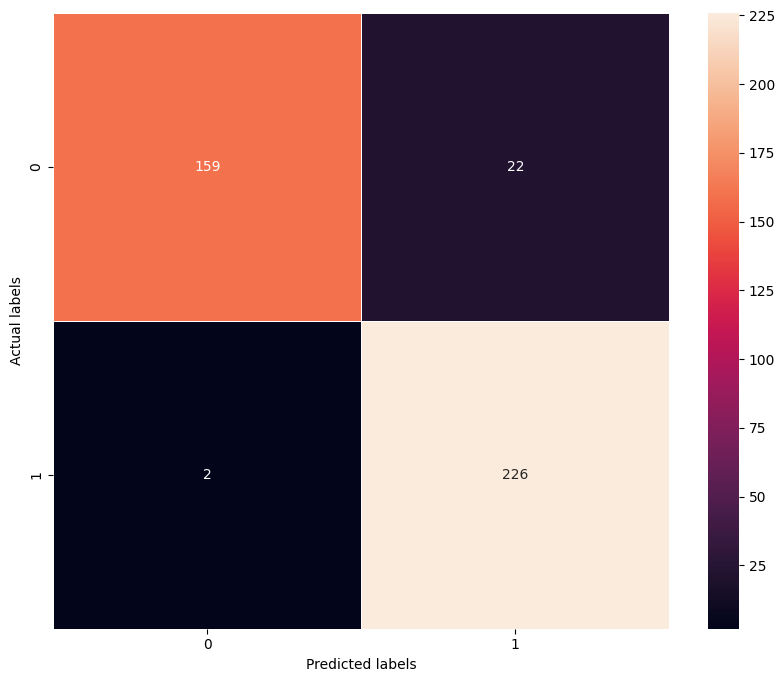

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .5, square = True)
plt.xlabel('Predicted labels')
# plt.title('Accuracy: '.format((accuracy_score(y_test, y_pred3))))
plt.ylabel('Actual labels')
plt.show()

## Saving the model using Joblib 

In [50]:
## Save the model

X = StandardScaler().fit_transform(X)

In [51]:
model5.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=32, n_estimators=50,
                       random_state=0)

In [52]:
import joblib

In [53]:
joblib.dump(model5,'churn_predict_model')

['churn_predict_model']

In [54]:
RFM = joblib.load('churn_predict_model')

In [55]:
ohenc_data.columns

Index(['CUS_DOB_YEAR', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'YEARS_WITH_US', 'total debit amount', 'total credit amount',
       'total debit transactions', 'total credit transactions',
       'total transactions', 'Status', 'TAR_Desc_EXECUTIVE', 'TAR_Desc_LOW',
       'TAR_Desc_MIDDLE', 'TAR_Desc_PLATINUM', 'CUS_Marital_Status_DIVORCE',
       'CUS_Marital_Status_MARRIED', 'CUS_Marital_Status_OTHER',
       'CUS_Marital_Status_PARTNER', 'CUS_Marital_Status_SINGLE',
       'CUS_Marital_Status_WIDOWED'],
      dtype='object')

In [56]:
RFM.predict([[2000,22,45.34,1,18,975.24,34,142,5,147,0,1,0,0,0,0,0,0,1,0]])

array([0])

In [57]:
RFM.predict([[1860,66,18000.0,0,14,6934.60,0.00,1,0,1,0,1,0,0,0,0,0,0,1,0]])

array([0])